# Chapter 4 - Fourier Tranform

This notebook introduces some of the relevant aspects of Fourier Transform and spectral analysis.

## Imports
We will need some standard imports for this notebook:

In [39]:
! pip install matplotlib==3.1.3 # Latest version of matplotlib with gwpy causes ImportError: cannot import name '_png' from 'matplotlib'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp38-cp38-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.0
    Uninstalling matplotlib-3.7.0:
      Successfully uninstalled matplotlib-3.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gwpy 3.0.2 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.


In [2]:
import matplotlib.pyplot as plt 
import numpy as np

And we will need the GW-specific software `gwpy` and `pycbc`:

In [3]:
! pip install -q gwpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 KB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 35.4 MB/s eta 0:00:00


In [4]:
! pip install -q lalsuite pycbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 60.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 65.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 KB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 KB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.7/299.7 KB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 KB 4.8 

## Introduction

One of the most important concepts in the analysis of signals is the _Fourier transform_:

$$
X(f)=\int_{-\infty}^{\infty} x(t)\,e^{-i2\pi ft}\,dt
\tag{1}
$$

which gives the component $X(f)$ at a frequency $f$ of any signal $x(t)$. So if $x(t)$ corresponds to a sound, then $X(f)$ are the frequency components of the sound.
Of course, the original signal can be written in terms of the frequency components again:

$$
x(t)=\int_{-\infty}^{\infty} X(f)\,e^{i2\pi ft}\,df
\tag{2}
$$

An equivalent way you will often see of writing the Fourier pair is to use angular frequency $\omega = 2\pi\,f$ instead, so that $df = d\omega/2\pi$. Then the above equations can be expressed:

$$
\begin{aligned}
X(\omega) &= \int_{-\infty}^{\infty} x(t)\,e^{-i\omega t}\,dt \\
x(t) &= \frac{1}{2\pi}\int_{-\infty}^{\infty} X(\omega)\,e^{i\omega t}\,d\omega
\end{aligned}
\tag{3}
$$

(Sometimes this pair is defined so that $1/\sqrt{2\pi}$ is the prefactor in each equation instead of $1$ and $1/2\pi$, but it’s still the same idea.) We’ll use the first two equations, expressed using ordinary frequency $f$, from now on.
In general, both the functions $x(t)$ and $X(f)$ are complex.

![Figure 1](https://raw.githubusercontent.com/astrophysicsvivien/GWA2023/main/figure1.png)

Figure 1: Representation of the Fourier transform as a linear projection operation.


### Real data

Although the above equations work even for $x(t)$ complex, most often we deal with real data (such as displacement of position for a wave on a string). Expanding the real and imaginary parts of the first equation (1) it is simple to see that, if $x(t)$ is real, then

$$
X(−f) = X^*(f)
\tag{4}
$$

Thus if we express $X(f)$ in terms of its real and imaginary parts, $X(f) = X_r(f)+iX_i(f)$, we have:

$$
\begin{aligned}
X_r(−f) &= X_r(f) \\
X_i(−f) &= −X_i(f)
\end{aligned}
\tag{5}
$$

Proof: expand the exponential:

$$
e^{−i2\pi ft} = \cos(2\pi ft) − i \sin( 2\pi ft)
\tag{6}
$$

so that the real and imaginary parts of equation (1) can be written

$$
\begin{aligned}
X_r(f) &= \int_{-\infty}^{\infty} x(t)\cos(2\pi ft) dt \\
X_i(f) &= -\int_{-\infty}^{\infty} x(t)\sin( 2\pi ft) dt
\end{aligned}
\tag{7}
$$

The first integral is even in $f$ and the second is odd.

This means that we don’t usually bother to plot the negative frequency components when
transforming real data, since we know what they must be.

### Interpretation of the transform

Since the function $X(f)$ is in general complex (even if $x(t)$ is real) we wrote it above as $X(f)= X_r(f)+iX_i(f)$. Physically what does this mean? How can we have complex frequency components? We write the equation (2) out using $X_r$ and $X_i$ to give:

$$
\begin{aligned}
x(t) &= \int_{-\infty}^{\infty} X(f)\,e^{i2\pi ft}\,df = \int_{-\infty}^{\infty} \left[ X_r(f)+iX_i(f) \right] e^{i2\pi ft}\,df \\
 &= \int_{-\infty}^{\infty} X_r(f) \cos(2\pi ft)\,df − \int_{-\infty}^{\infty} X_i(f) \sin(2\pi ft)\,df
\end{aligned}
\tag{8}
$$

(the two imaginary terms vanish by equation (5), as they should since $x(t)$ is real). So the Fourier transform consists of an expansion in terms of cosine and sine waves: this is required because the _phase_ of the signal as well as its _amplitude_ must be allowed for.

Alternatively (and the most common way) we can write $X = \mid X \mid e^{i\theta}$ to give

$$
x(t)= \int_{-\infty}^{\infty} \mid X(f) \mid e^{i(2\pi ft+\theta)} df
\tag{9}
$$

By equation (\ref{eq:4}) clearly

$$
\begin{aligned}
\mid X(-f) \mid &= \mid X(f) \mid \\
\theta(−f) &= −\theta(f)
\end{aligned}
\tag{10}
$$

Usually we present the Fourier transform in this way, and plot just $\mid X(f)\mid$ for just positive
frequencies if transforming real signals.

### Real, sampled data

The Fourier transform (FT) equation (1) can be evaluated on a computer, and there are routines available in numpy to do so. Numerically, the data corresponding to $x(t)$ will be given as a series of points, not continuous values. So in practice we must transform _sampled_ data stored as an array $[x_0,x_1,x_2...]$ of points, taken at equal time intervals $\Delta t$ apart. (This is what we usually get from an experiment.)

A consequence of this sampling is that the FT is periodic, meaning that $X(f)$ repeats in ‘frequency space’ at the sampling rate $F_s = 1/\Delta t$. (The reason for this repetition can be proved by multiplying $x(t)$ in equation (1) by a periodic series of Dirac delta functions, then Fourier transforming.)

It follows, very importantly, that we must sample a signal at a fast enough rate to ensure that we cover a large enough frequency range to examine our signal. It’s not just that we would miss out on the higher frequency components that might be of interest - if higher frequencies are present in the pre-sampled signal, they actually appear in the transformed signal in the wrong place: this is known as _aliasing_. (In experiments, data is usually sampled after the signal goes through an analog _anti-aliasing filter_ to remove these higher frequencies.)

### Real, finite data range

In a computer implementation of the Fourier transform equations, we can have only a finite range of data, i.e. covering a finite time interval $\tau$. This has the effect of broadening otherwise infinitely sharp peaks, unless $\tau$ happens to match exactly the period of the underlying signal(s). (The reason for this is again discussed in PX2232. The proof is based on multiplying $x(t)$ in equation (1) by a top-hat function, and considering a ‘convolution’ in frequency space.)

Since we furthermore have sampled data, there will be a fixed number $N$ of points in this time interval.

### Real, periodic data

Since the data we possess must be recorded over a finite time window $\tau$, we in fact can assume anything we like for the data outside this time interval (The Fourier transform components will still represent the known signal in the finite window exactly). The maths becomes far simpler if we let the $x$ data itself repeat periodically outside this window, since this results in a Fourier _series_. In other words, only certain discrete frequencies are needed to represent the original signal if we use this assumption. The frequencies are all multiples of the $1/\tau$, so the point separation in frequency space is $\Delta f = 1/\tau$.

### The discrete Fourier transform

In the actual computer implementation, we take $N$ sampled points, at sampling rate $F_s = 1/\Delta t$, and the data is taken as repeating with period $\tau = N\Delta t$. This results in a discrete Fourier transform or DFT, with $N$ points repeating with frequency $F_s$.

**Note**: the interval between frequency points is $\Delta f = F_s/N = 1/N\Delta t = 1/\tau$ as expected.

Some years ago (in 1965 by J. Cooley and J. Tukey) it was discovered that the DFT could be sped up hugely by clever programming; this implementation, called the fast Fourier transform or FFT, is almost always employed in Fourier transforming data. It is their paper we are looking at this week.



Mathematically, the DFT pair normally used is (where $k, n = 0, . . . , N − 1$)

$$
\begin{aligned}
X_k &= \sum_{n=0}^{N-1} x_n e^{-i2\pi nk/N} \\
x_n &= \frac{1}{N}\sum_{k=0}^{N-1} X_k e^{i2\pi kn/N}
\end{aligned}
\tag{11}
$$

### Summary

The important key points to recall are:

 1. the FFT operates on a set of $N$ data points with sample rate $F_s$ (so the time separation is $\Delta t = 1/F_s$).
 2. The transform consists of N data points covering the frequency range $F_s$ (so the frequency separation is $\Delta f = F_s/N$).
 3. Both the original $x$ points and the transformed $X$ points are periodically repeated.

The DFT or FFT is a good representation of the ‘true’ ordinary FT when the sampling rate is fast enough (so that high frequencies are not aliased) and the data length is large enough (so that the frequency resolution is high).

### Implementation

#### Complex numbers

In python, the complex number $i$ is written `j`, e.g.:

In [5]:
a=2.0+3.0j
b=-0.4+0.2j

You can use standard operations with those numbers, and access complex-number-specific methods:

In [6]:
print(a+b) # addition
print(a*b) # multiplication
print(np.real(a)) # the real part via the "function"
print(a.real) # the real part via the "method"
print(b.imag) # imaginary part
print(np.abs(a)) # absolute value (or modulus or magnitude)
print(np.angle(b)) #argument (in many applications referred to as the "phase")

(1.6+3.2j)
(-1.4000000000000001-0.8000000000000002j)
2.0
2.0
0.2
3.605551275463989
2.677945044588987


#### FFT

There are several FFT [algorithms](http://docs.scipy.org/doc/numpy/reference/routines.fft.html) which are simple to use. First set up a data array to test out the method:

[0.    0.625 1.25  1.875 2.5   3.125 3.75  4.375 5.    5.625
 6.25  6.875 7.5   8.125 8.75  9.375]


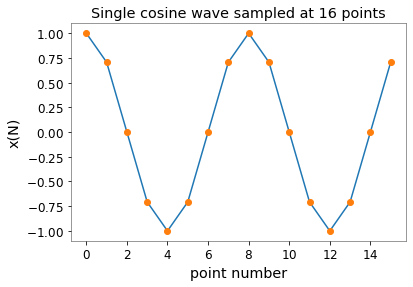

In [40]:
# Examine a small number of points to see what happens more easily
N=16 # the fft algorithm is fastest for N a power of 2
tau = 10.0 # time length in seconds
t = np.linspace(0, tau, N, endpoint=False) # creates N points to cover tau seconds
# Choose endpoint False so that signal would fit exactly periodically within tau
print(t)
#
f = 0.2 # frequency in Hz
x = np.cos(2*np.pi*f*t) # create x array, amplitude 1.0 
plt.plot(x)
plt.plot(x, 'o') # show as points and line 
# Note how the plot is exactly periodic

plt.title('Single cosine wave sampled at {} points'.format(N))
plt.xlabel('point number')
plt.ylabel('x(N)')
plt.grid()

This sets up a cosine wave of just 16 points, so it looks a bit rough when plotted out, but it helps us to see better what happens when we look at the FFT. Use this code snippet to do the FFT:

[ 1.24474906e-17+0.00000000e+00j -7.82453173e-17+6.09960263e-17j
  5.00000000e-01-1.72254642e-16j  1.32271076e-17-7.03290092e-17j
  1.53080850e-17-2.77555756e-17j  3.00706952e-17-7.03290092e-17j
  5.55111512e-17-4.97899625e-17j  3.49475145e-17+6.09960263e-17j
 -4.30636606e-17+0.00000000e+00j  3.49475145e-17-6.09960263e-17j
  5.55111512e-17+4.97899625e-17j  3.00706952e-17+7.03290092e-17j
  1.53080850e-17+2.77555756e-17j  1.32271076e-17+7.03290092e-17j
  5.00000000e-01+1.72254642e-16j -7.82453173e-17-6.09960263e-17j]


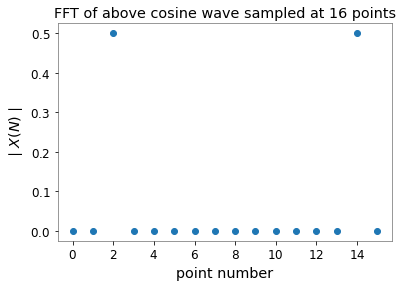

In [41]:
X = np.fft.fft(x)/N # fft and normalise 
plt.plot(np.abs(X),'o')
plt.title('FFT of above cosine wave sampled at '+str(N)+' points') 
plt.xlabel('point number')
plt.ylabel('$\mid X(N)\mid$')
plt.grid()
print(X)

Two things to notice:

 1. Point 0 is the zero frequency component, points 1 to 8 are the positive frequency components, points 9 to 15 are the negative frequency components. To put the latter in the ‘correct’ position we can reorder them, so that point 15 appears effectively in the -1 position, point 14 in the -2 position, and so on (since the FT is periodic with period $F_s$, there isn’t really a ‘correct’ interval any more. The algorithm returns the interval $0$ to $F_s$, but you might prefer $−F_s/2$ to $F_s/2$). 

 But since the negative frequency components just repeat the positive ones (as the array $x$ is real) we can just ignore them.


 2. Printing $X$ shows that it has real and imaginary parts, but that the imaginary part is zero within numerical error. This is because we picked a cosine wave as the test data.

You can use `rfft()` when dealing with real-valued data, to only return the positive frequency components. To return not just the Fourier amplitudes but also the corresponding frequencies, you can use `rff.freq()`:

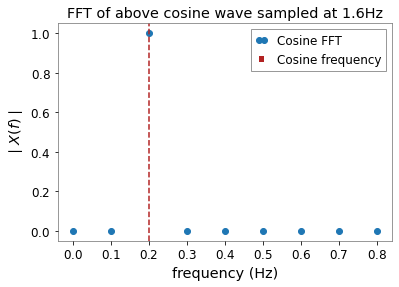

In [42]:
X = np.fft.rfft(x)*2./N # fft and normalise 
freq = np.fft.rfftfreq(x.size, d=tau/N)

plt.plot(freq, np.abs(X), 'o',label='Cosine FFT')
plt.axvline(f,ls='--',color='firebrick',label='Cosine frequency')
plt.title('FFT of above cosine wave sampled at {}Hz'.format(N/tau)) 
plt.xlabel('frequency (Hz)')
plt.ylabel('$\mid X(f)\mid$')
plt.legend()
plt.grid()

The division by $N$ normalisation is there because the `fft` is implemented by numpy with a different pre-factor, equation (11); putting it in gives agreement with the ordinary Fourier transform amplitudes defined earlier. (There is no uniform convention on defining the prefactors.) Later, we’ll see that we have to multiply by $N$ again before doing the inverse discrete Fourier transform `ifft`.

# **Questions**

 * Why is the signal amplitude found with `fft()` above equal to 0.5 instead of 1 as with `rfft()`?
 * Create a signal with multiple narrow frequencies, which are not lining up at exact frequency values from the FFT, and plot the FFT.
 * Use a _window_ to do the previous question. Multiply the time series you created with a Bartlett window:
 ```python
 x = TestData(N, Fs)
 window = np.bartlett(x.size)
 x_windowed = x*window
 ```
 before taking the FFT.

Let's now take a look at Compact Binary Coalescence (CBC) waveforms:

In [43]:
from pycbc.waveform import get_td_waveform

hp, _ = get_td_waveform(approximant="TaylorT4",
                 mass1=10.,
                 mass2=10.,
                 delta_t=1./4096.,
                 f_lower=20)

We need to apply a window function to our time-domain data before transforming, which we can do using the scipy.signal module:

In [44]:
from scipy.signal import get_window

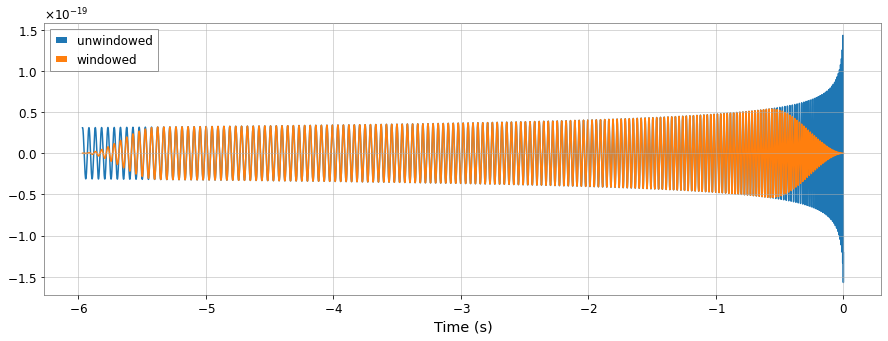

In [45]:
plt.figure(figsize=(15,5))

window = get_window(('tukey',0.2), len(hp))
hp_window = hp*window

plt.plot(hp.sample_times,hp,'-',label='unwindowed')
plt.plot(hp_window.sample_times,hp_window,'-',label='windowed')
plt.xlabel('Time (s)')
plt.legend();

This is very important for both the start and end of an inspiral-only template as is the case here. But remember from chapter 2, approximants that include inspiral, merger and ringdown (IMR), are already smoothly going to zero at the end, as physically the ringdown does.

We will take FFTs of those signals, and compare with a signal directly generated in the frequency domain:

In [46]:
from pycbc.waveform import get_fd_waveform

In [47]:
hp_tf2, _ = get_fd_waveform(approximant="TaylorF2",
                 mass1=10.,
                 mass2=10.,
                 delta_f=1./8,
                 f_lower=20)

The FFT convention used in the definition of the frequency domain approximants is different, so that the normalisation is $\Delta\,t$, not $N$:

In [48]:
hp_tilde = np.fft.rfft(hp)*hp.delta_t # fft and normalise
hp_tilde_window = np.fft.rfft(hp_window)*hp_window.delta_t # fft and normalise

freq = np.fft.rfftfreq(len(hp), d=1/hp.sample_rate) # same freq array for both FFTs

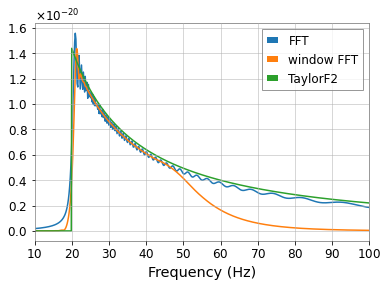

In [49]:
plt.plot(freq,np.abs(hp_tilde),label='FFT')
plt.plot(freq,np.abs(hp_tilde_window),label='window FFT')
plt.plot(hp_tf2.sample_frequencies,np.abs(hp_tf2),label='TaylorF2')
plt.xlim(10,100)
plt.xlabel('Frequency (Hz)')
plt.legend();

# **Question**
 * What can explain the differences between the three frequency domain traces?

## Fourier frequencies and Aliasing

Let's pretend we have two one-second stretch of data sampled at 16kHz, one with a signal at 9Hz and one with a signal 1Hz. (16kHz is the default LIGO-Virgo sampling frequency):

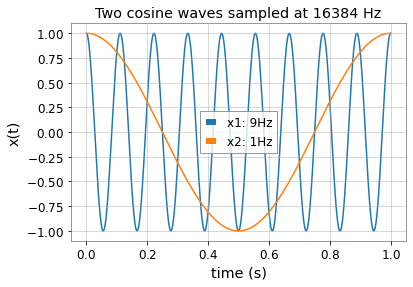

In [50]:
sampling_rate=16384 # sampling rate in Hz
tau = 1. # time length in seconds
t = np.linspace(0, tau, int(tau*sampling_rate), endpoint=False) # creates N points to cover tau seconds
# Choose endpoint False so that signal would fit exactly periodically within tau

#defining two signal:
f1 = 9. # frequency in Hz
f2 = 1.
x1 = np.cos(2*np.pi*f1*t) # create x array, amplitude 1.0
x2 = np.cos(2*np.pi*f2*t)

plt.plot(t,x1,label='x1: 9Hz')
plt.plot(t,x2,label='x2: 1Hz')

plt.title('Two cosine waves sampled at {} Hz'.format(sampling_rate))
plt.xlabel('time (s)')
plt.ylabel('x(t)')
plt.legend()

With such a large sampling rate, we can easily distinguish those two signals. But if we try to use a much lower sampling rate, say, 10Hz:

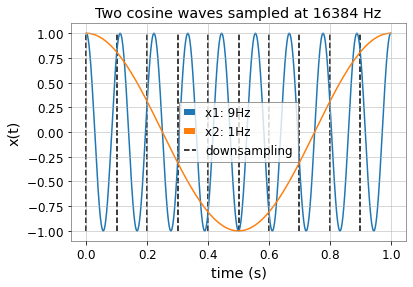

In [51]:
downsampling_rate=10 # in Hz

downsampled_t = np.linspace(0, tau, int(tau*downsampling_rate), endpoint=False)

plt.plot(t,x1,label='x1: 9Hz')
plt.plot(t,x2,label='x2: 1Hz')
plt.vlines(downsampled_t,ymin=np.min([x1,x2]), ymax=np.max([x1,x2]),
           linestyles='--',label='downsampling')

plt.title('Two cosine waves sampled at {} Hz'.format(sampling_rate))
plt.xlabel('time (s)')
plt.ylabel('x(t)')
plt.legend()

The black dashed lines are 1/10Hz = 0.1 seconds apart. Taking only the data points from `x1` and `x2` at those time will lead to indistinguishible signals.

# **Questions**

* Write a function that can downsample the x1 and x2 time series. Plot that downsampled signal at the `downsampling_rate` of 10Hz.
* Demonstrate what are the Nyquist frequencies of both signals with a suitable series of plots.

While its easier to illustrate aliasing with simple sinusoid signals, the very same principle applies to gravitational-wave templates:

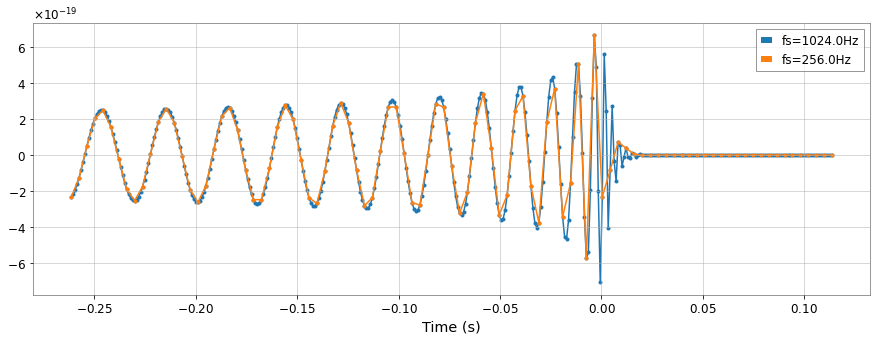

In [52]:
plt.figure(figsize=(15,5))

hp, _ = get_td_waveform(approximant="SEOBNRv4_opt",
                 mass1=30.,
                 mass2=30.,
                 delta_t=1./1024.,
                 f_lower=30)

hp_downsampled=hp[::4]

plt.plot(hp.sample_times,hp,'.-',label='fs='+str(hp.sample_rate)+'Hz')
plt.plot(hp_downsampled.sample_times,hp_downsampled,'.-',label='fs='+str(hp_downsampled.sample_rate)+'Hz')
plt.xlabel('Time (s)')
plt.legend();

Where the signal reaches frequencies higher than the Nyquist frequency, we are losing power.

## Data Smoothing

Let's now take a look at Data Smoothing with _Fourier Filtering_. We start by creating a signal, a background, and some noise to make some data:

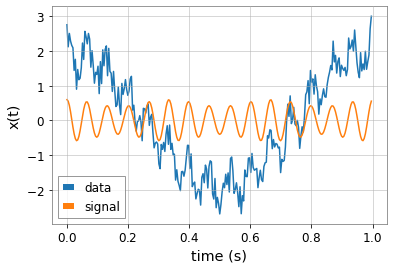

In [53]:
N=256 # the fft algorithm is fastest for N a power of 2
tau = 1.0 # time length in seconds
t = np.linspace(0, tau, N, endpoint=False) # creates N points to cover tau seconds
f=15.0
f2=18.0

true_signal = 0.5*np.cos(2*np.pi*f*t)+0.1*np.cos(2*np.pi*f2*t) #
bckg = 2.0*np.cos(2*np.pi*1.*t) # background drift
noise = np.random.uniform(low=-0.5,high=0.5,size=t.size) # random noise
data = true_signal + bckg + noise

plt.plot(t,data,label='data')
plt.plot(t,true_signal,label='signal')

plt.xlabel('time (s)')
plt.ylabel('x(t)')
plt.legend()

Now we will try filtering with a low-pass filter, to remove the high-frequency components. Here we are using `scipy.signal.butter` to create a low-pass filter. There are many other options !

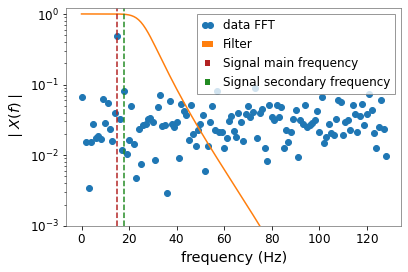

In [54]:
X = np.fft.rfft(data)*2./N # fft and normalise 
freq = np.fft.rfftfreq(data.size, d=tau/N) # get the frequency values

from scipy import signal
b, a = signal.butter(5, 0.2, 'low') # creating the filter
w, h = signal.freqz(b, a, worN=freq.size) # getting the frequency response of the filter
# NOTE: in practice, there are routines such as scipy.signal.filtfilt() which will apply
# the filter directly in the time-domain, WITHOUT having to do the FFT manually.

plt.semilogy(freq, np.abs(X), 'o',label='data FFT')
plt.semilogy(freq, np.abs(h), label='Filter')
plt.ylim(0.001,1.2)

plt.axvline(f,ls='--',color='firebrick',label='Signal main frequency')
plt.axvline(f2,ls='--',color='forestgreen',label='Signal secondary frequency')

plt.xlabel('frequency (Hz)')
plt.ylabel('$\mid X(f)\mid$')
plt.legend()
plt.grid()

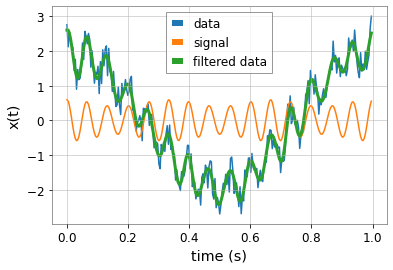

In [55]:
filtered_X = X*h*np.conj(h) # Applying the filter twice, once forward and once backward to avoid dephasing.
# Note this is not causal, so can only be done after we have the whole data recorded (not in real-time).

filtered_data = np.fft.irfft(filtered_X)*N/2. # inverse fft and normalise

plt.plot(t,data,label='data')
plt.plot(t,true_signal,label='signal')
plt.plot(t,filtered_data,label='filtered data',lw=3)

plt.xlabel('time (s)')
plt.ylabel('x(t)')
plt.legend()

# **Questions**

* The example above is illustrates _Fourier low pass filtering_. Now, we also want to get rid of the low-frequency content, so we should band-pass the signal. Try it !
* Investigate the effect of applying windowing functions on the data before the FFTs.
 
**NOTE**: in practice, we don't know a priori the frequencies of the true signal. So we need to be very careful with filtering !

**NOTE**: in practice, we will use routines such as `scipy.signal.filtfilt()` which apply the filter directly in the time-domain, without having to do the FFT and IFFT ourselves.

As another example, we can reproduce the bandpass filter from the chapter 3 notebook:

In [56]:
from gwosc.datasets import event_gps

In [57]:
gps = event_gps('GW190521')
segment = (int(gps)-16, int(gps)+16)

In [58]:
from gwpy.timeseries import TimeSeries
ldata = TimeSeries.fetch_open_data('L1', *segment)

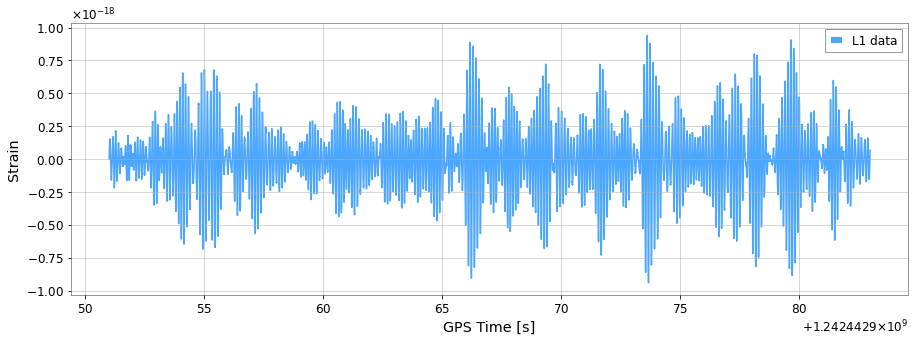

In [59]:
plt.figure(figsize=(15,5))
plt.plot(ldata.times,ldata,label='L1 data',color='gwpy:ligo-livingston')
plt.xlabel('GPS Time [s]')
plt.ylabel('Strain')
plt.legend();

In [60]:
ldata_tilde = np.fft.rfft(ldata.value)*2./ldata.size # fft and normalise 
freq = np.fft.rfftfreq(ldata.size, d=ldata.dt) # get the frequency values

With the FFT of the data, we can take a look at the amplitude spectrum (or the power spectrum):

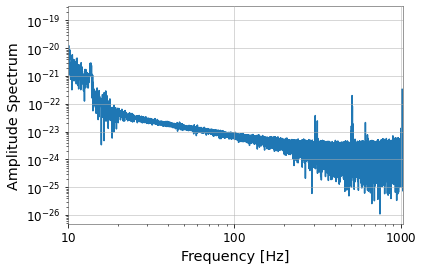

In [61]:
plt.loglog(freq,np.abs(ldata_tilde))
plt.xlim(10,1024)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude Spectrum');

Note that this is slightly different from the amplitud (or power spectrum) **densities**. We will look at this in more details next week.

Note: we can get the power specturm, the square of the amplitude spectrum, by calculating the FFT of the convolution of the data with itself. Here is a quick illustration, without computing the scaling factor:

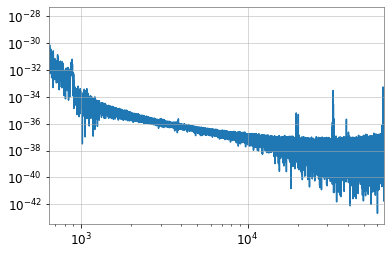

In [62]:
plt.loglog(np.abs(np.fft.fft(np.convolve(ldata.value,ldata.value))))
plt.xlim(10*2*ldata.duration.value,1024*2*ldata.duration.value);

The amplitude spectrum above does not look quite right. As the data starts and ends abruptly, it needs to be windowed first:

In [63]:
window = get_window('hann', ldata.size)
ldata_window = ldata * window

In [64]:
ldata_window_tilde = np.fft.rfft(ldata_window.value)*2./ldata_window.size # fft and normalise 

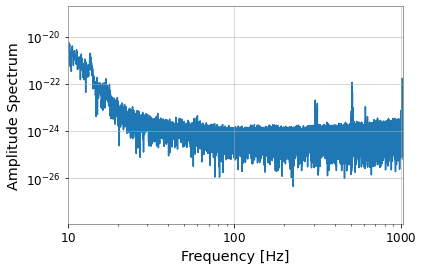

In [65]:
plt.loglog(freq,np.abs(ldata_window_tilde)) # Note the freq array is unchanged...
plt.xlim(10,1024)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude Spectrum');

That looks better ! 

Note that we can also use the built-in `fft()` method of the `TimeSeries`, getting the same result (without needing to normalise or compute the `freq` array):

In [66]:
ldata_fft=ldata_window.fft() # for comparison, the built-in method for fft

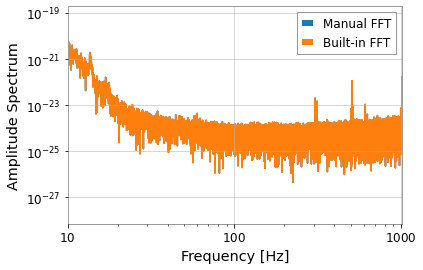

In [67]:
plt.loglog(freq,np.abs(ldata_window_tilde),label='Manual FFT')
plt.loglog(ldata_fft.frequencies,np.abs(ldata_fft),label='Built-in FFT')
plt.xlim(10,1024)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude Spectrum')
plt.legend();

Now we can set to zero all the frequencies below 50Hz and above 100Hz, to focus on that 50-to-100 band:

In [68]:
ldata_window_tilde_bd=np.where((freq.value>50) & (freq.value<100),ldata_window_tilde,0.)

In [69]:
ldata_window_bd=np.fft.irfft(ldata_window_tilde_bd)*ldata_window.size/2. # ifft and normalise 

In [70]:
ldata_bp=ldata.bandpass(50,100) # for comparison, the built-in method.

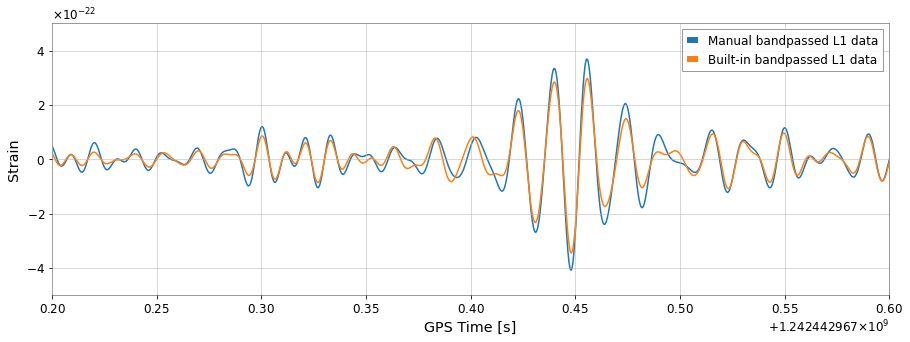

In [71]:
plt.figure(figsize=(15,5))
plt.plot(ldata.times,ldata_window_bd,label='Manual bandpassed L1 data')
plt.plot(ldata_bp.times,ldata_bp,label='Built-in bandpassed L1 data')
plt.xlim(gps-0.2,gps+0.2)
plt.ylim(-5e-22, 5e-22)
plt.xlabel('GPS Time [s]')
plt.ylabel('Strain')
plt.legend();

In practice, now that it's clear what the built-in `fft()` and `bandpass()` methods do, we will often simplify our codes by using them directly. The small remaining differences are due to fine details of windowing and other settings. While that level of difference is not an issue in general, it shows it will be important to apply the exact same treatment to the data and the signal template.

# **Question** 
 * Try to reproduce this analysis on other events. GW150914 is among the easiest ones...